## **EDA And Feature Engineering Of Google Play Store Dataset**

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('dataset/googleplaystore.csv')
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##  Generic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [4]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 14)

### Checking for Missing Values

In [6]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## DATA CLEANING

In [7]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

The error shows that there are some alphanumeric values in this column (i.e., '3.0M') 

Point to note - All the values in the Reviews columns are numeric format but stored in string.

In [10]:
df['Reviews'].str.isnumeric().sum()

10840

In [11]:
df[~df['Reviews'].str.isnumeric()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Here you can see the where '3.0M' is present. So we can drop that row as the alphanumeric value is present in only one row.

In [12]:
df_new = df.copy()                                 #We make a copy of that dataframe and try to do all the updation in that dataframe (df_new)
df_new = df_new.drop(df_new.index[10472]) 

In [13]:
df_new = df_new.drop(columns='Unnamed: 0')

In [14]:
df_new[~df_new['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


So now that outlier is removed.

In [15]:
# Now we can convert the Reviews column to interger type.
df_new['Reviews'] = df_new['Reviews'].astype(int)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [17]:
df_new['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df_new['Size'] = df_new['Size'].replace('Varies with device','0')
df_new['Size'] = df_new['Size'].str.replace('k','')

In [19]:
lst = []
for items in df_new['Size']:
    if 'M' in items:
        part = items.split('M')
        it = float(part[0])
        mul_prt = it * 1000
        lst.append(mul_prt)
    else:
        lst.append(float(items))


df_new = df_new.assign(Size=lst)

In [20]:
df_new['Size'] = df_new['Size'].astype(float)

In [21]:
df_new['Size'] = df_new['Size'].replace(0,np.nan)

In [22]:
df_new[df_new['Size'] == np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [24]:
df_new.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1681,Flow Free,GAME,4.3,1295557,11000.0,"100,000,000+",Free,0,Everyone,Puzzle,"April 11, 2018",4.0,4.1 and up
2548,Tumblr,SOCIAL,4.4,2955326,NaN,"100,000,000+",Free,0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680,4000.0,"100,000+",Free,0,Everyone,Books & Reference,"August 20, 2016",3.05,4.0.3 and up
5862,Miami crime simulator,GAME,4.0,254518,100000.0,"10,000,000+",Free,0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up
8736,FINAL FANTASY DIMENSIONS,FAMILY,4.3,8450,1100.0,"100,000+",Paid,$13.99,Everyone,Role Playing,"March 15, 2017",1.1.3,2.3.3 and up
5003,AE Roundy POP,FAMILY,4.4,5262,26000.0,"100,000+",Free,0,Everyone,Casual,"March 23, 2016",1.1.2,2.3 and up
8503,DK Murali,SOCIAL,4.8,65,7100.0,500+,Free,0,Teen,Social,"February 25, 2017",1.1.2,4.1 and up
1233,Postmates Food Delivery: Order Eats & Alcohol,FOOD_AND_DRINK,3.6,22875,22000.0,"1,000,000+",Free,0,Everyone,Food & Drink,"July 27, 2018",4.2.6,5.0 and up
6137,HTC Sense Input - BG,TOOLS,3.3,218,4100.0,"10,000+",Free,0,Everyone,Tools,"November 9, 2015",1.0.606877,5.0 and up
5636,One Night at Golden Freddy's,GAME,3.3,2717,4000.0,"100,000+",Free,0,Teen,Action,"December 7, 2017",0.1,2.3 and up


In [25]:
df_new['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [26]:
df_new['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [27]:
# Removing all the unecessary characters from the values
item_to_remove = ['$','+',',']
col_to_clean = ['Installs','Price']

for c in item_to_remove:
    for col in col_to_clean:
        df_new[col] = df_new[col].str.replace(c,'')

In [28]:
df_new['Installs'].unique(),df_new['Price'].unique()

(array(['10000', '500000', '5000000', '50000000', '100000', '50000',
        '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
        '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object),
 array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
        '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
        '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
        '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
        '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
        '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
        '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
        '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
        '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
        '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
        '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90',

#### All the special characters are removed from the specific columns

In [29]:
df_new['Price'] = df_new['Price'].astype(float)
df_new['Installs'] = df_new['Installs'].astype(int)

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [31]:
df_new['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [32]:
df_new['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Handling Last Updated Column

In [33]:
df_new['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Now this column should be converted to datatime format.

In [34]:
df_new['Last Updated'] = pd.to_datetime(df_new['Last Updated'])

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [36]:
df_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


### Now we have done most of the Data Cleaning Required and now we will save the data and perform EDA on this dataset.

In [37]:
df_new.to_csv('dataset/google-playstore-data_Cleaned.csv')

## Exploratory Data Analysis

In [38]:
df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [39]:
df_new[df_new.duplicated('App')].shape

(1181, 13)

### Observation
Datasets have duplicate records

In [40]:
df_new.drop_duplicates(subset='App',inplace=True,keep='first')

In [41]:
df_new.shape

(9659, 13)

In [42]:
# Finding all the Categorical Columns form the dataset
num_features = []
cat_features = []
for column in df_new.columns:
    if df_new[column].dtypes != 'O':
        num_features.append(column)
    else:
        cat_features.append(column)

print("Numerical Categories: ", num_features)
print("Categorical Categories: ", cat_features)

Numerical Categories:  ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']
Categorical Categories:  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [43]:
## Proportion of count data on categorical columns
for col in cat_features:
    print(df_new[col].value_counts())
    print('-----------------------')

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64
-----------------------
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NE

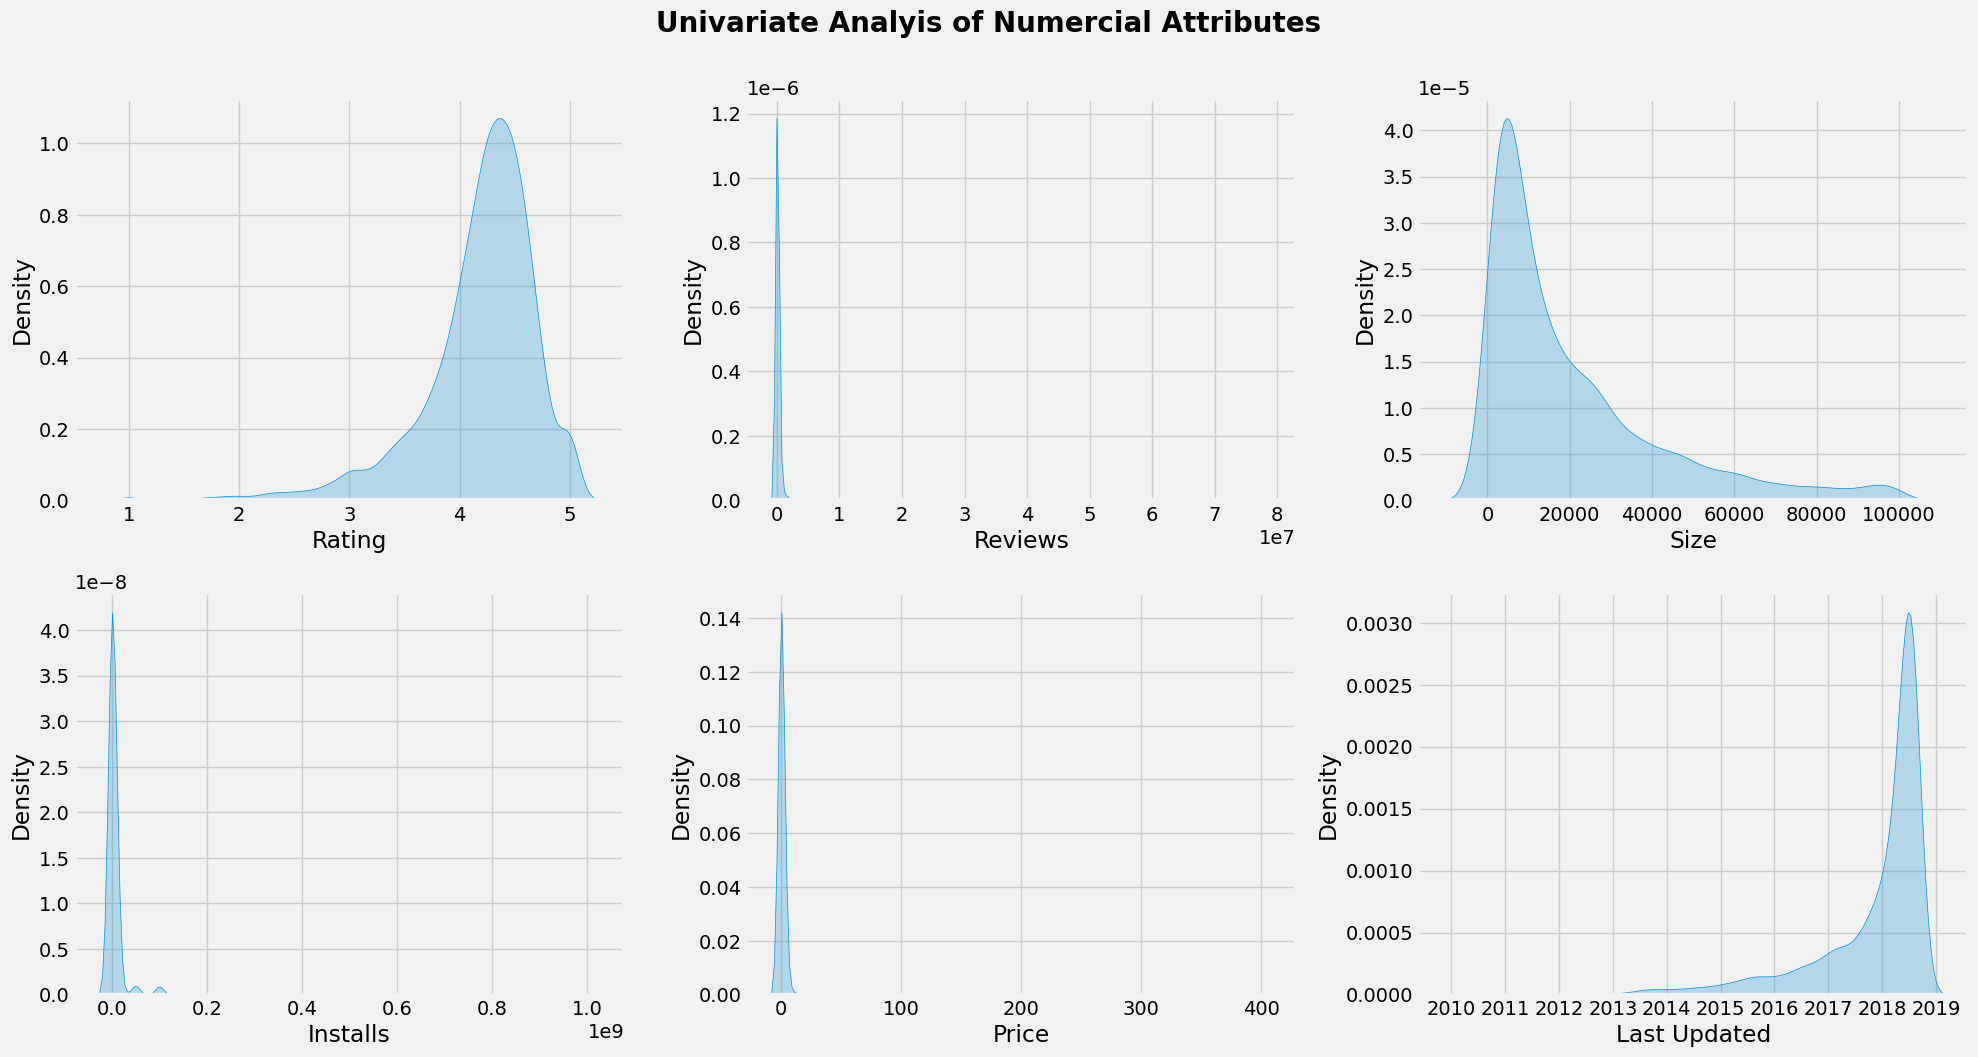

In [44]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analyis of Numercial Attributes",fontsize=20,fontweight='bold',x=0.5,y=1.0)

for i in range(0, len(num_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df_new[num_features[i]],shade=True)      #Plotting all the graphs using kde (kernal density plot)
    plt.xlabel(num_features[i])
    plt.tight_layout()      #this is used to remove the unwanted space in the graph
    

### Observation
- Installs, Price, Reviews, Size are Right Skewed and Rating and Last Updated are left skewed

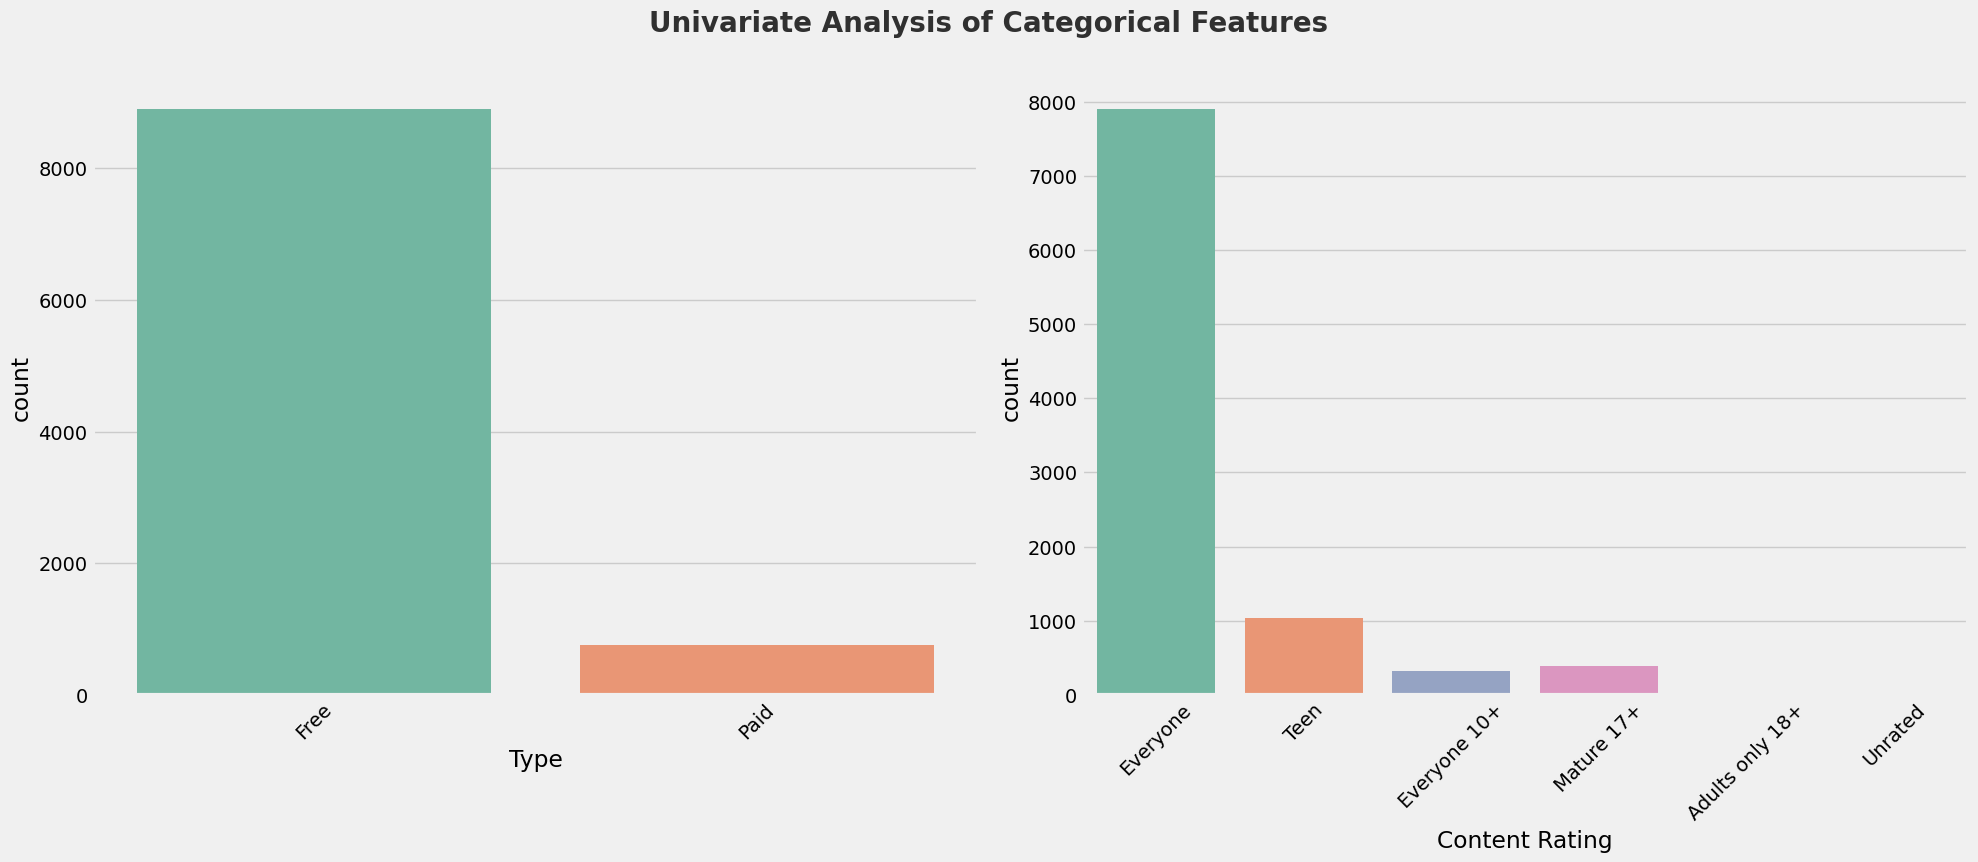

In [45]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_new[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Which is the most popular app category?

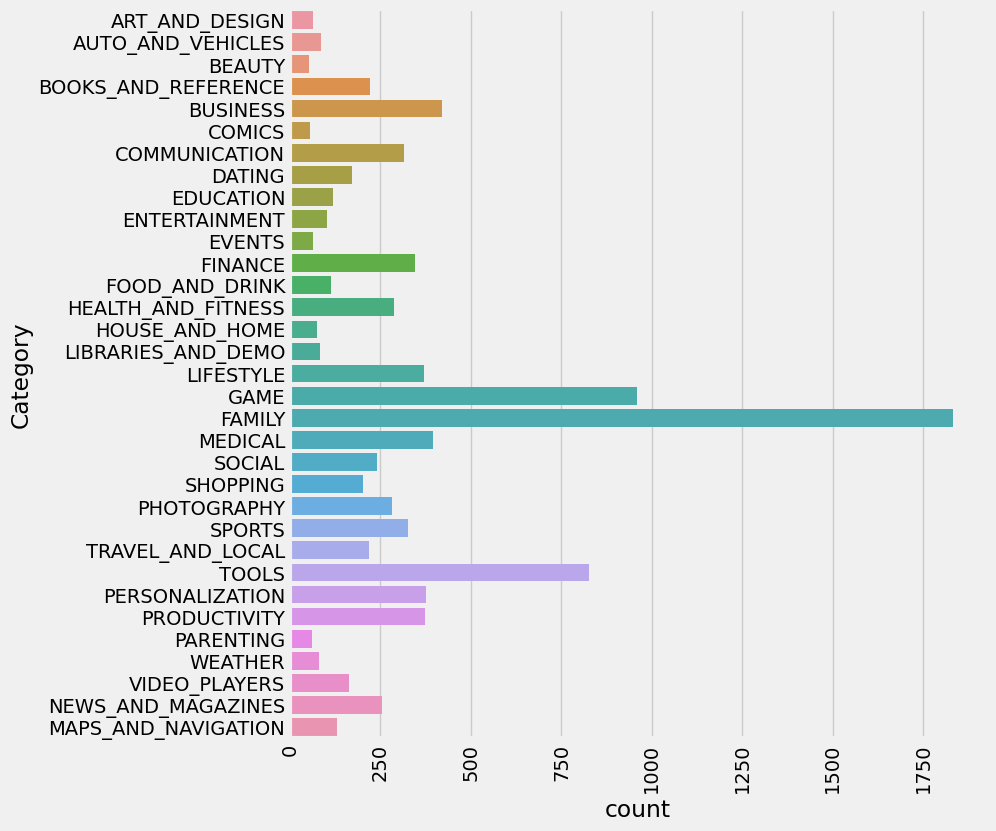

In [46]:
plt.figure(figsize=(8,9))
sns.countplot(y=df_new['Category'])
plt.xticks(rotation=90)
plt.show()

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

### Top 10 App Categories

In [47]:
category = pd.DataFrame(df_new['Category'].value_counts())
category.rename(columns={'Category':'Counts'},inplace=True)

In [48]:
category

,Counts
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


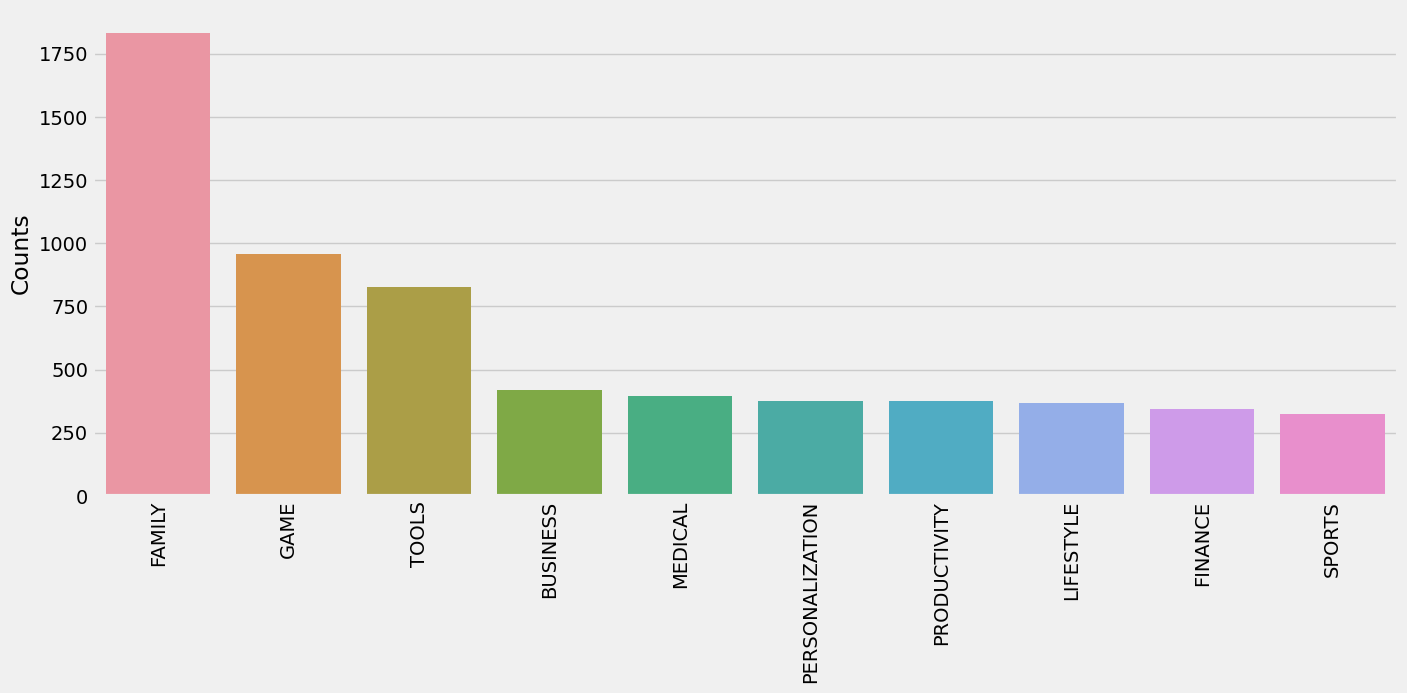

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Counts',data = category[:10])
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

## Which Category has largest number of installations??

Text(0, 0.5, 'Categories')

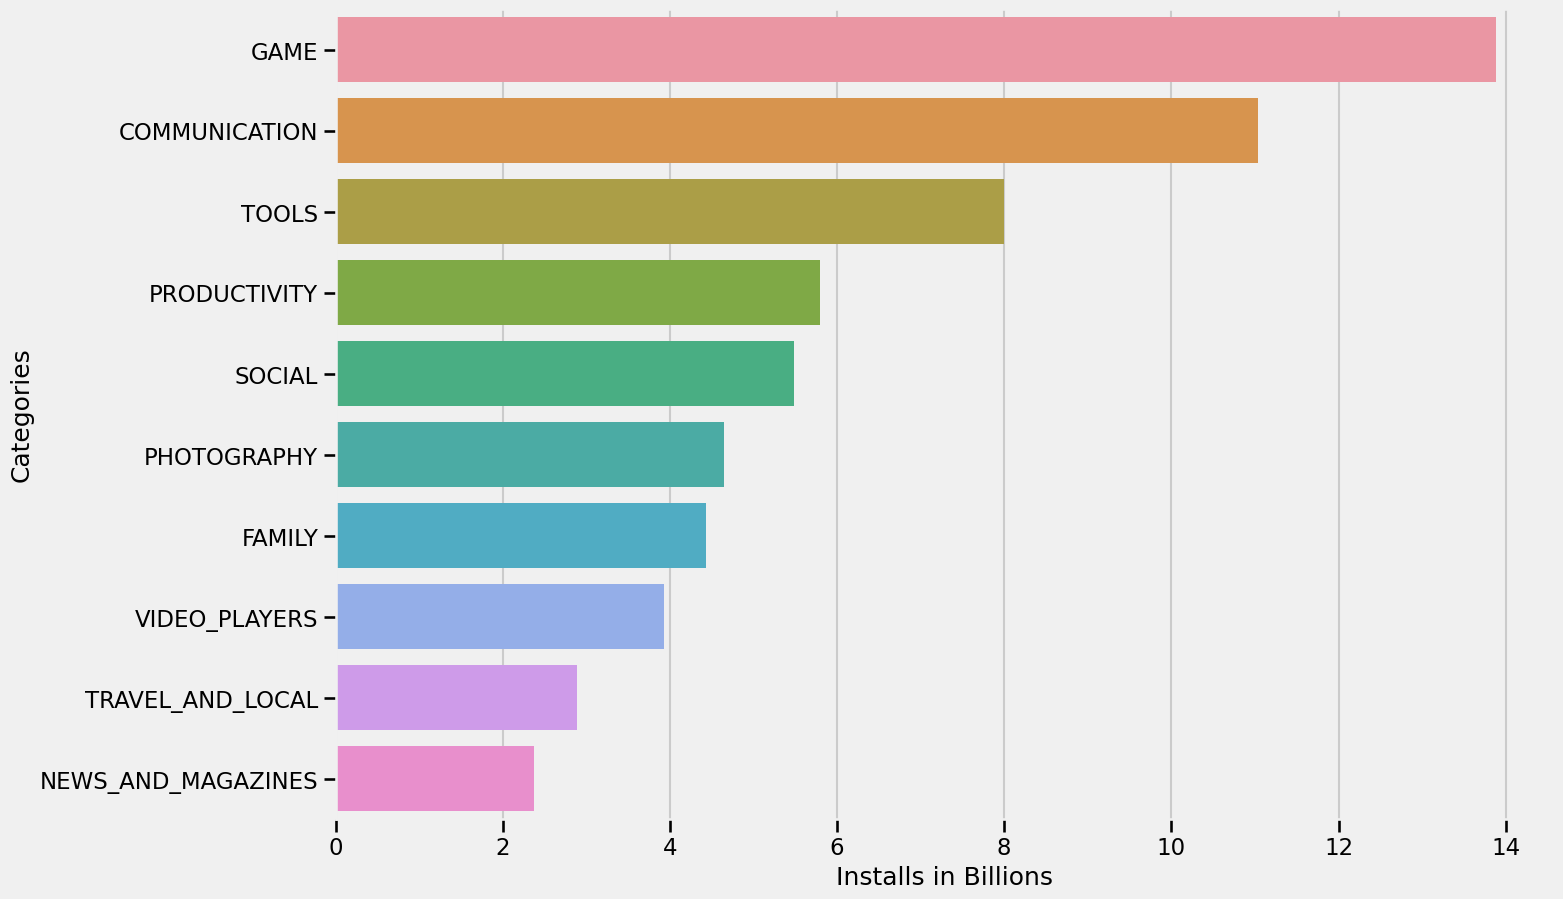

In [50]:
df_cat_ins = df_new.groupby('Category').Installs.sum().sort_values(ascending = False).reset_index()
df_cat_ins.Installs = df_cat_ins.Installs/1000000000  


sns.set_context("talk")

plt.figure(figsize=(14,10))
sns.barplot(y='Category',x = 'Installs',data = df_cat_ins.head(10))
plt.xlabel('Installs in Billions')
plt.ylabel('Categories')

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

In [51]:
df_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


## What are the Top 5 most installed Apps in Each popular Categories ??

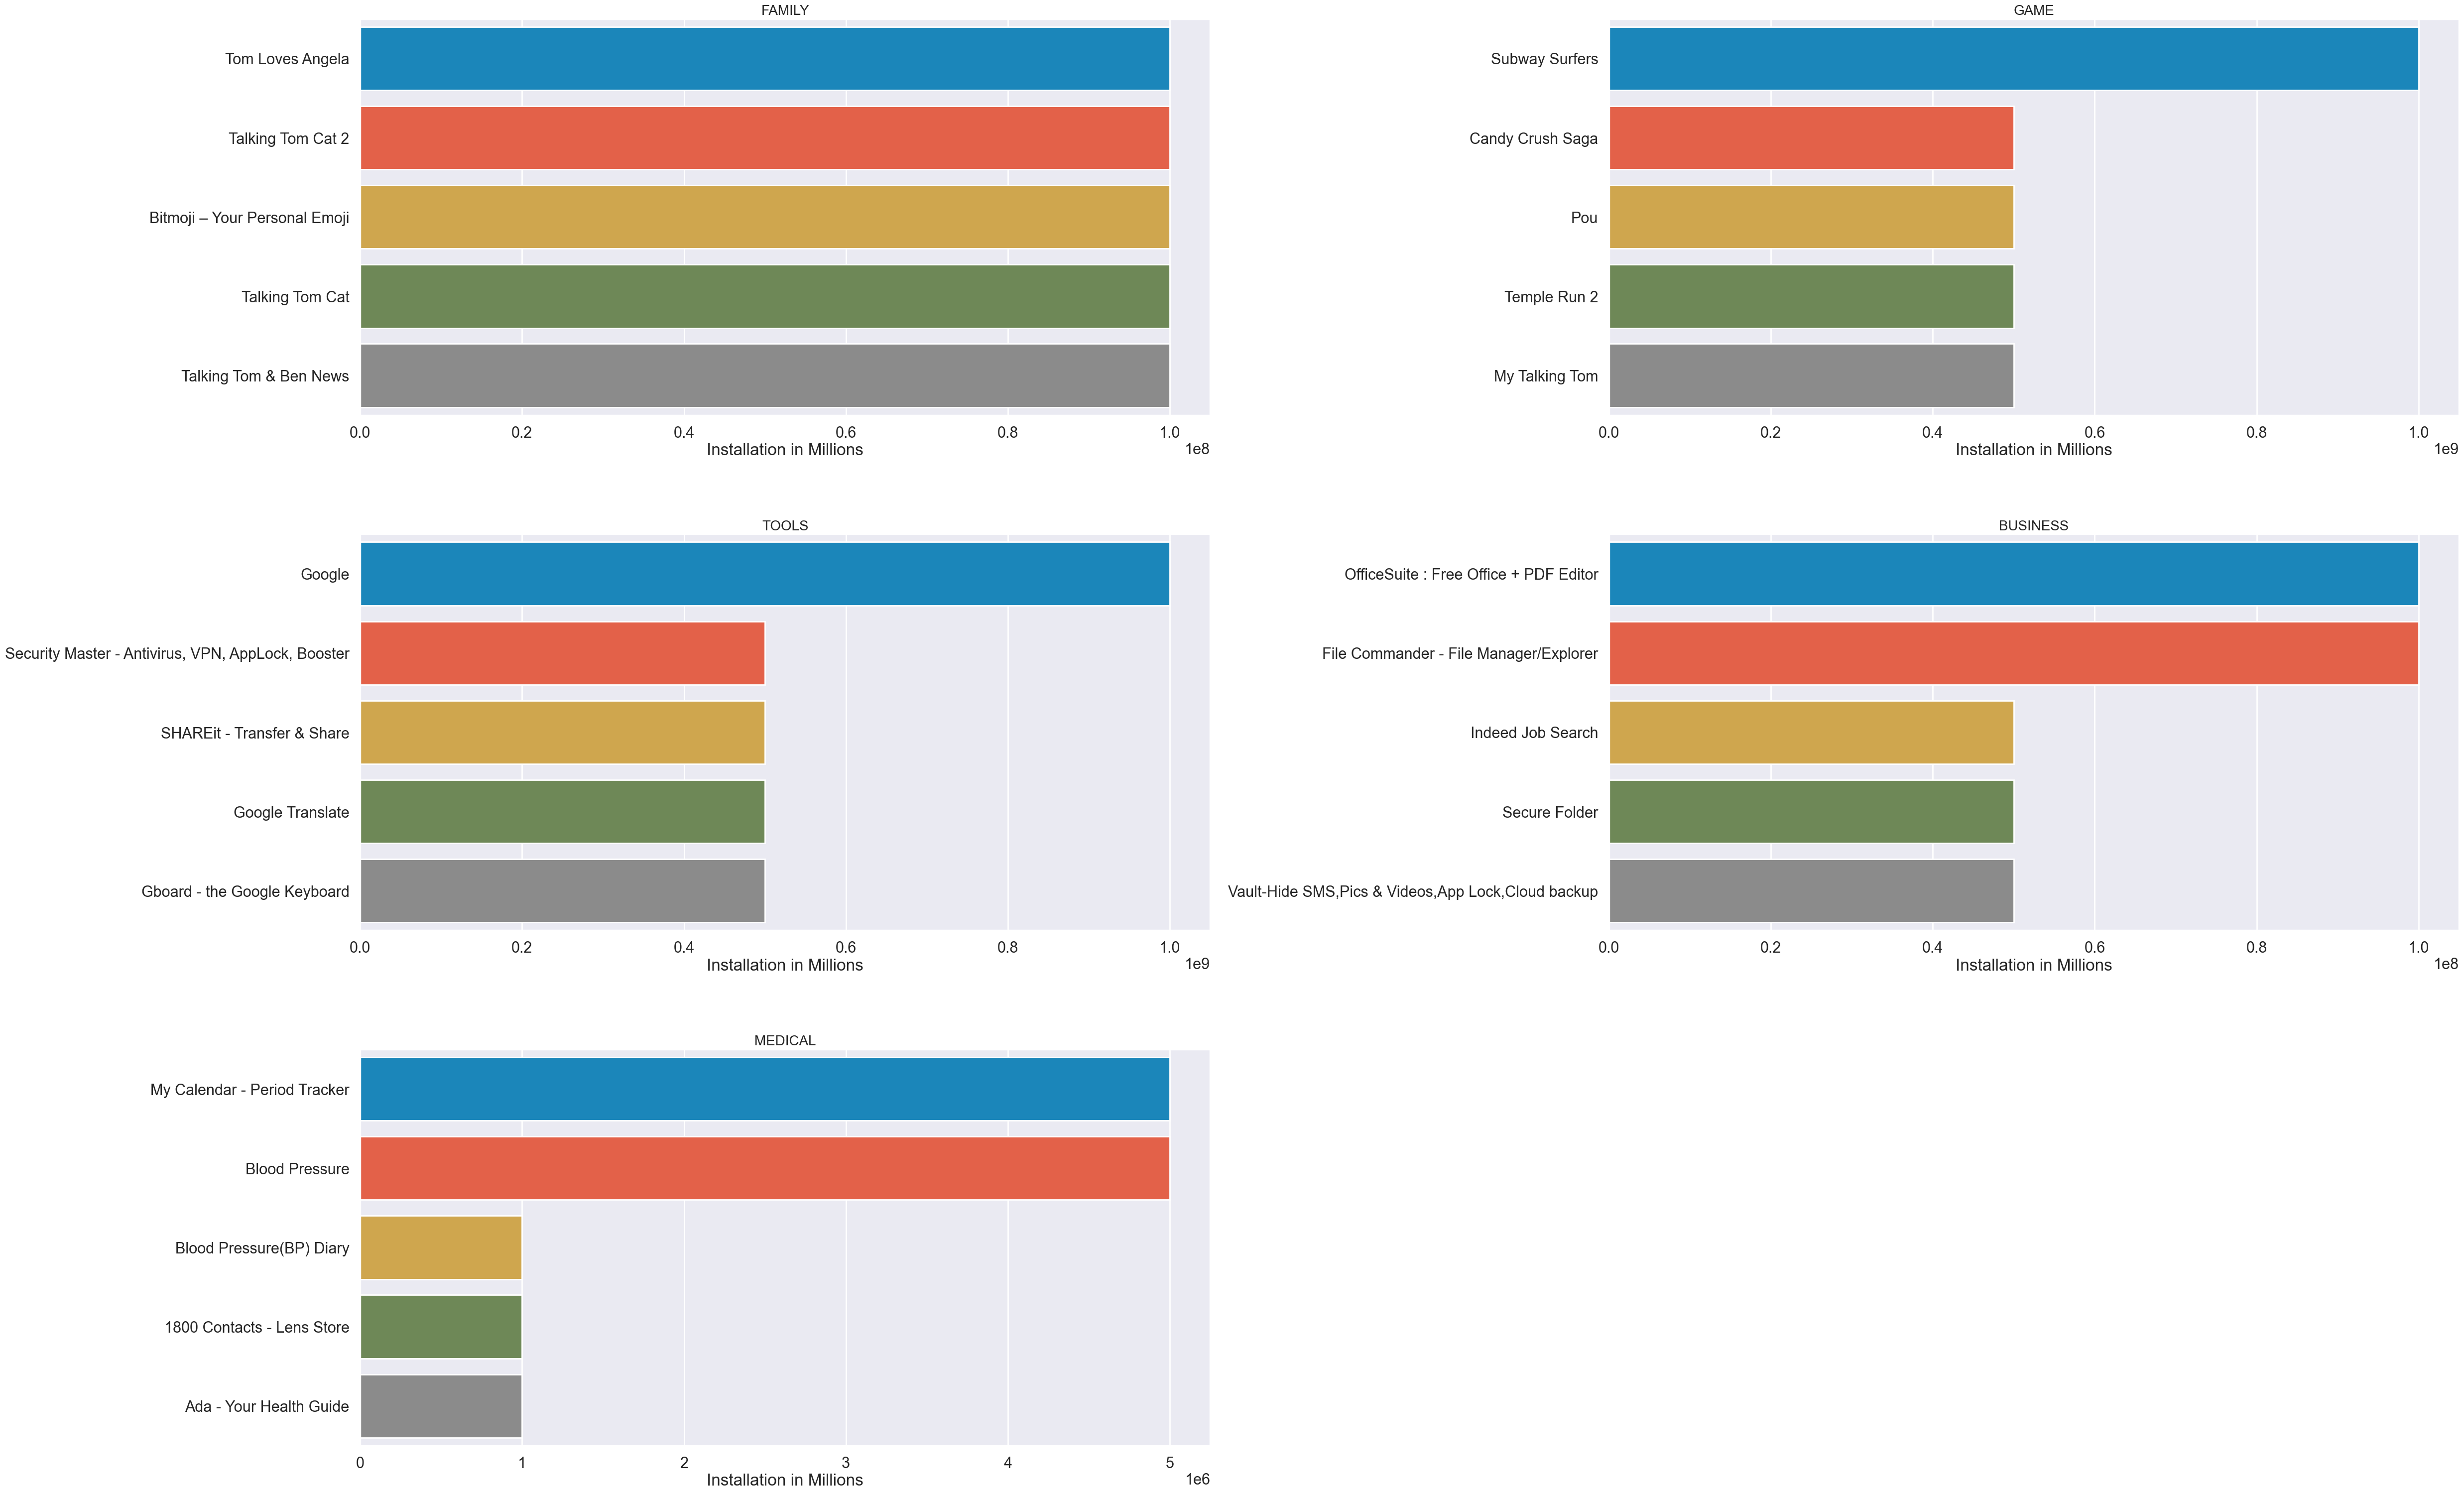

In [52]:
dfa = df_new.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = list(df_new['Category'].value_counts().reset_index()['index'])
apps = apps[:5]

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(50,40))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings?

In [53]:
df_rate = df_new.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()
toprate_app = df_rate[df_rate['Rating'] == 5.0]
print("Number of App with 5 Star Rating are: ",toprate_app.shape[0])
toprate_app.head(1)

Number of App with 5 Star Rating are:  271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category